In [138]:
import pandas as pd
import numpy as np

In [139]:
data = pd.read_csv('aps_failure_training_set.csv')

In [140]:
data.head(2)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0


In [142]:
data['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [143]:
data['class'].value_counts(normalize = True)

neg   0.983
pos   0.017
Name: class, dtype: float64

In [4]:
#Checking missing data
data.isna().sum().any()

False

In [5]:
data.shape

(60000, 171)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [7]:
print(data.dtypes)


class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
ae_000    object
af_000    object
ag_000    object
ag_001    object
ag_002    object
ag_003    object
ag_004    object
ag_005    object
ag_006    object
ag_007    object
ag_008    object
ag_009    object
ah_000    object
ai_000    object
aj_000    object
ak_000    object
al_000    object
am_0      object
an_000    object
ao_000    object
ap_000    object
aq_000    object
ar_000    object
as_000    object
at_000    object
           ...  
dl_000    object
dm_000    object
dn_000    object
do_000    object
dp_000    object
dq_000    object
dr_000    object
ds_000    object
dt_000    object
du_000    object
dv_000    object
dx_000    object
dy_000    object
dz_000    object
ea_000    object
eb_000    object
ec_00     object
ed_000    object
ee_000    object
ee_001    object
ee_002    object
ee_003    object
ee_004    object
ee_005    object
ee_006    object
ee_007    object
ee_008    object
ee_009    obje

In [8]:
# Based on the Datatypes All the columns except aa_000 are Appearing as object but not

(data.dtypes == np.int64)
num_data = data.select_dtypes(include=[np.number])
num_data.columns

Index(['aa_000'], dtype='object')

In [9]:
# Reason for this is pandas function is not able to identify 'na' as null value but recognised as string
data1 = data.replace('na', np.nan, regex=True)

In [10]:
print(data1.isnull().sum().any())

True


In [11]:
## Identifying high null columns
High_null_columns = data1.columns[data1.isnull().sum()/len(data1)*100 > 20]
len(High_null_columns)

24

In [12]:
data2 = data1.drop(High_null_columns,axis = 1)

In [13]:
data2.shape

(60000, 147)

In [14]:
data2.isnull().sum()

class         0
aa_000        0
ac_000     3335
ae_000     2500
af_000     2500
ag_000      671
ag_001      671
ag_002      671
ag_003      671
ag_004      671
ag_005      671
ag_006      671
ag_007      671
ag_008      671
ag_009      671
ah_000      645
ai_000      629
aj_000      629
ak_000     4400
al_000      642
am_0        629
an_000      642
ao_000      589
ap_000      642
aq_000      589
ar_000     2723
as_000      629
at_000      629
au_000      629
av_000     2500
          ...  
dl_000     4008
dm_000     4009
dn_000      691
do_000     2724
dp_000     2726
dq_000     2726
dr_000     2726
ds_000     2727
dt_000     2727
du_000     2726
dv_000     2726
dx_000     2723
dy_000     2724
dz_000     2723
ea_000     2723
eb_000     4007
ec_00     10239
ed_000     9553
ee_000      671
ee_001      671
ee_002      671
ee_003      671
ee_004      671
ee_005      671
ee_006      671
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 147, dtype: int6

In [15]:
print(data2.dtypes)


class     object
aa_000     int64
ac_000    object
ae_000    object
af_000    object
ag_000    object
ag_001    object
ag_002    object
ag_003    object
ag_004    object
ag_005    object
ag_006    object
ag_007    object
ag_008    object
ag_009    object
ah_000    object
ai_000    object
aj_000    object
ak_000    object
al_000    object
am_0      object
an_000    object
ao_000    object
ap_000    object
aq_000    object
ar_000    object
as_000    object
at_000    object
au_000    object
av_000    object
           ...  
dl_000    object
dm_000    object
dn_000    object
do_000    object
dp_000    object
dq_000    object
dr_000    object
ds_000    object
dt_000    object
du_000    object
dv_000    object
dx_000    object
dy_000    object
dz_000    object
ea_000    object
eb_000    object
ec_00     object
ed_000    object
ee_000    object
ee_001    object
ee_002    object
ee_003    object
ee_004    object
ee_005    object
ee_006    object
ee_007    object
ee_008    object
ee_009    obje

In [16]:
data2.head()

,class,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2130706438,0,0,0,0,0,0,37250,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,0,0,0,0,0,0,0,18254,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,228,0,0,0,0,0,0,1648,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,70,0,10,0,0,0,318,2212,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,1368,0,0,0,0,0,0,43752,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [17]:
# By observing the data most of the columns looks like numerical but datatype of these values appearing as object type
# Converting the actual numerical values to numerical remaining unwanted charecters will be converted to nulls.
#pd.to_numeric(data, errors='coerce')
data3 = data2.apply(pd.to_numeric, errors='ignore')

In [18]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 147 entries, class to eg_000
dtypes: float64(145), int64(1), object(1)
memory usage: 67.3+ MB


In [19]:
data3.head()
## We can observe data was almost cleansed data ,Data conversion of numerical columns is performed,
# 160 - float64 columns, 1 - int64 column , 1 object column(Target)

,class,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# Missing data Treatment

In [20]:
## Getting the columns with Null data
null_columns = data3.columns[data3.isnull().sum()/len(data3)*100>0]

In [21]:
len(null_columns)

145

In [22]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data3.describe()
## in most of the columns data is skewed ,standard deviation is high

,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000.000,56665.000,57500.000,57500.000,59329.000,59329.000,59329.000,59329.000,59329.000,59329.000,...,59329.000,59329.000,59329.000,59329.000,59329.000,59329.000,59329.000,59329.000,57276.000,57277.000
mean,59336.500,356014263.031,6.819,11.007,221.636,975.722,8606.015,88591.281,437096.632,1108373.830,...,445489.728,211126.447,445734.306,393946.198,333058.240,346271.430,138729.983,8388.915,0.091,0.213
std,145430.057,794874918.480,161.543,209.793,20478.464,34200.530,150322.029,761731.190,2374281.890,3262607.274,...,1155539.821,543318.817,1168313.931,1121044.407,1069159.697,1728056.007,449510.045,47470.432,4.369,8.831
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,834.000,16.000,0.000,0.000,0.000,0.000,0.000,0.000,308.000,13834.000,...,2936.000,1166.000,2700.000,3584.000,512.000,110.000,0.000,0.000,0.000,0.000
50%,30776.000,152.000,0.000,0.000,0.000,0.000,0.000,0.000,3672.000,176020.000,...,233796.000,112086.000,221518.000,189988.000,92432.000,41098.000,3812.000,0.000,0.000,0.000
75%,48668.000,964.000,0.000,0.000,0.000,0.000,0.000,0.000,49522.000,913964.000,...,438396.000,218232.000,466614.000,403222.000,275094.000,167814.000,139724.000,2028.000,0.000,0.000
max,2746564.000,2130706796.000,21050.000,20070.000,3376892.000,4109372.000,10552856.000,63402074.000,228830570.000,179187978.000,...,77933926.000,37758390.000,97152378.000,57435236.000,31607814.000,119580108.000,19267396.000,3810078.000,482.000,1146.000


In [23]:
num_column_names = data3.select_dtypes(include=[np.number]).columns

print(len(num_column_names))

146


In [24]:
for column in data3[num_column_names]:
    if data3[column].isnull().any():
        data3[column]=data3[column].fillna(data3[column].median())

In [25]:
data3.shape

(60000, 147)

In [26]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 147 entries, class to eg_000
dtypes: float64(145), int64(1), object(1)
memory usage: 67.3+ MB


In [27]:
data3.isnull().sum().any()
## So the Data was cleansed and ready for Analysis.

False

In [28]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 147 entries, class to eg_000
dtypes: float64(145), int64(1), object(1)
memory usage: 67.3+ MB


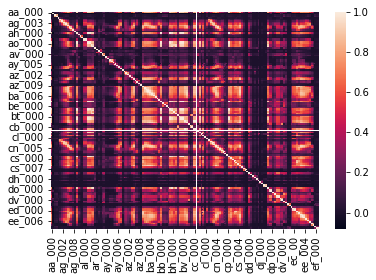

In [29]:
## Checking multicollinearity

# import modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# plotting correlation heatmap
dataplot=sns.heatmap(data3.corr())
  
# displaying heatmap
plt.show()

In [94]:
data3.shape

(60000, 147)

In [97]:
data3 = data3.reset_index(drop=True)

In [100]:
corr = data3.iloc[:,1:].corr()
corr

,aa_000
aa_000,1.000


In [101]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 147 entries, class to eg_000
dtypes: int64(1), object(146)
memory usage: 67.3+ MB


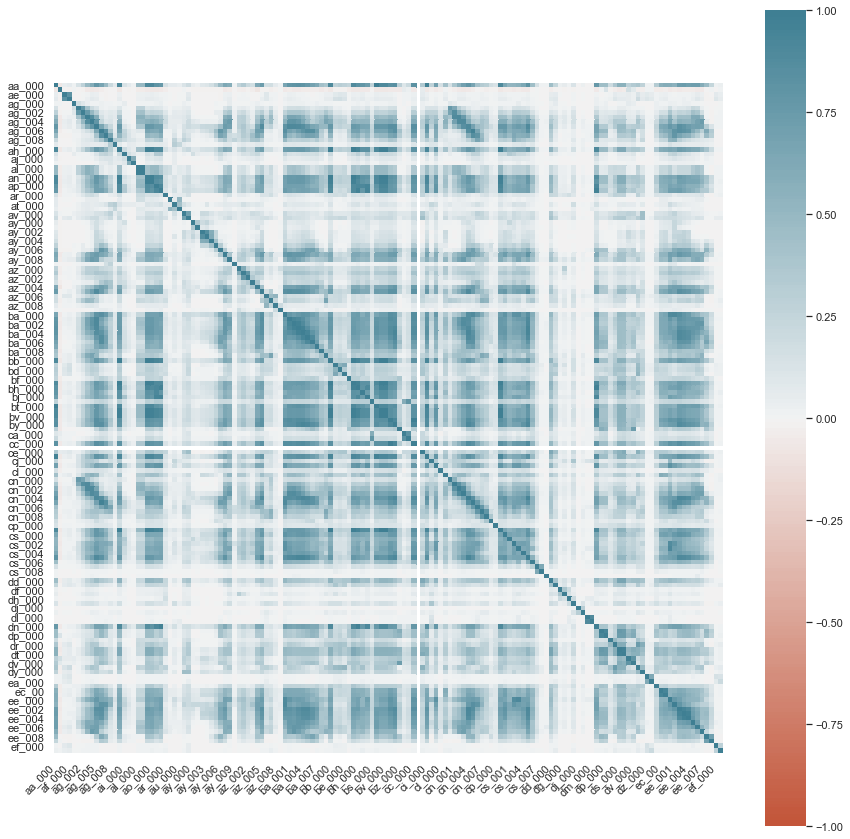

In [34]:

corr = data3.iloc[:,1:].corr()
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [35]:
## Based on Correlogram there is multicollinearity issue between the independant variables,multi collinearity is a issue for linear models


## Modelling Methodology: 
### Perform Modeling on Linear,Tree based,Ensembling Models.
### For the Comparison using one linear,one bagging ,one boosting,one Tree based Model.
### Selected a single model from 4 modelling types i.e. Tree based,bagging,boosting,linear models namely Decision Tree Classifier,Random forest Classifier,Gradient boosting Classifier,Logistic Regression.
### Linear models like Logistic Regression most likely influenced by Multi-Collinearity,So An Experiment by removing High multi collinear variables
### Modelling By removing least influential features based on the feature importances

In [83]:

X = data3.iloc[:,1:]
Y = data3.iloc[:,0]

In [86]:
# Encode the target column 
Lab_enc = {"neg":0,"pos":1}
Y = Y.map(Lab_enc)

In [88]:
X.shape

(60000, 146)

In [101]:
## Standardizing full cleansed data
Scaling = StandardScaler()
X_scl =Scaling.fit_transform(X)

In [43]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# def calculate_vif_(X, thresh=100):
#     cols = X.columns
#     variables = np.arange(X.shape[1])
#     dropped=True
#     while dropped:
#         dropped=False
#         c = X[cols[variables]].values
#         vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

#         maxloc = vif.index(max(vif))
#         if max(vif) > thresh:
#             print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
#             variables = np.delete(variables, maxloc)
#             dropped=True

#     print('Remaining variables:')
#     print(X.columns[variables])
#     return X[cols[variables]]

In [73]:

def calc_VIF(x):
  vif= pd.DataFrame()
  vif['variables']=x.columns
  vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

  return(vif)

In [74]:
X_coll = calc_VIF(X)

In [49]:
len(X_coll[X_coll['VIF']>5])

102

In [50]:
X_coll[X_coll['VIF']>5]

,variables,VIF
0,aa_000,420.886
4,ag_000,15.961
5,ag_001,46.531
6,ag_002,811.378
7,ag_003,20628.577
8,ag_004,200254.900
9,ag_005,378246.411
10,ag_006,542765.189
11,ag_007,71925.867
12,ag_008,1725.857


In [76]:
print(len(X_coll[X_coll['VIF']>1000]))
print(len(X_coll[X_coll['VIF']>100]))
print(len(X_coll[X_coll['VIF']>50]))
print(len(X_coll[X_coll['VIF']>5]))




65
79
84
102


In [77]:
very_highcollinear = list(X_coll[X_coll['VIF']>100]['variables'])

In [78]:
very_highcollinear

['aa_000',
 'ag_002',
 'ag_003',
 'ag_004',
 'ag_005',
 'ag_006',
 'ag_007',
 'ag_008',
 'ag_009',
 'ah_000',
 'al_000',
 'an_000',
 'ao_000',
 'ap_000',
 'ay_000',
 'ay_001',
 'ay_002',
 'ay_003',
 'ay_004',
 'ay_005',
 'ay_006',
 'ay_007',
 'ay_008',
 'ay_009',
 'az_000',
 'az_001',
 'az_002',
 'az_003',
 'az_004',
 'az_005',
 'az_006',
 'az_007',
 'ba_000',
 'ba_001',
 'ba_002',
 'ba_003',
 'ba_004',
 'ba_005',
 'ba_006',
 'ba_007',
 'ba_008',
 'ba_009',
 'bb_000',
 'bg_000',
 'bh_000',
 'bi_000',
 'bj_000',
 'bt_000',
 'bu_000',
 'bv_000',
 'bx_000',
 'cc_000',
 'cn_000',
 'cn_001',
 'cn_002',
 'cn_003',
 'cn_004',
 'cn_005',
 'cn_006',
 'cn_007',
 'cn_008',
 'cn_009',
 'cq_000',
 'cs_002',
 'cs_003',
 'cs_004',
 'cs_005',
 'cs_006',
 'cs_007',
 'cs_009',
 'ee_000',
 'ee_001',
 'ee_002',
 'ee_003',
 'ee_004',
 'ee_005',
 'ee_006',
 'ee_007',
 'ee_008']

In [80]:
# Removing multi collinear features
X_mc_remvd = X.drop(very_highcollinear,axis =1)

In [81]:
X_mc_remvd.shape

(60000, 67)

In [103]:
## Standardzing the dataset after removing high collinear columns 
scaling=StandardScaler()
X_mc_remvd_scl = scaling.fit_transform(X_mc_remvd)

In [104]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 146 entries, aa_000 to eg_000
dtypes: float64(145), int64(1)
memory usage: 66.8 MB


In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [105]:
# Split train and test data by 70:30 ratio(Dataset with All columns)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)


In [106]:
# Split train and test data by 70:30 ratio(Dataset without high collinear columns)
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X_mc_remvd_scl,Y,test_size=0.3,random_state=0)


In [92]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [108]:
def Modelling(model,X_train,X_test,Y_train,Y_test):
    model = model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    score = accuracy_score(Y_test, Y_pred)
    return model,score
    

In [128]:
Models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]

In [129]:
model_df = pd.DataFrame(Models,columns = ['Model_name'])

In [130]:
model_df

,Model_name
0,LogisticRegression()
1,DecisionTreeClassifier()
2,RandomForestClassifier()
3,GradientBoostingClassifier()


In [115]:
Accuracy_scores = []

## Logistic Regression 

In [116]:

X_train_mc, X_test_mc, y_train_mc, y_test_mc
model , Score = Modelling(Models[0],X_train_mc,X_test_mc,y_train_mc,y_test_mc)
print('Model name:',model,'Accuracy:',Score*100)
Accuracy_scores.append(Score)


Model name: LogisticRegression() Accuracy: 98.86111111111111


C:\Users\Bhaskar\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Decision Tree Classifier


In [118]:
model , Score = Modelling(Models[1],X_train,X_test,y_train,y_test)
print('Model name:',model,'Accuracy:',Score*100)
Accuracy_scores.append(Score)

Model name: DecisionTreeClassifier() Accuracy: 99.02777777777779


In [119]:
model , Score = Modelling(Models[2],X_train,X_test,y_train,y_test)
print('Model name:',model,'Accuracy:',Score*100)
Accuracy_scores.append(Score)

Model name: RandomForestClassifier() Accuracy: 99.32777777777778


In [120]:
model , Score = Modelling(Models[3],X_train,X_test,y_train,y_test)
print('Model name:',model,'Accuracy:',Score*100)
Accuracy_scores.append(Score)

Model name: GradientBoostingClassifier() Accuracy: 99.17777777777778


In [124]:
Accuracy_scores_df = pd.DataFrame(Accuracy_scores,columns = ['Accuracy Score'])

In [131]:
results = pd.concat([model_df,Accuracy_scores_df],axis =1)

In [132]:
results

,Model_name,Accuracy Score
0,LogisticRegression(),0.989
1,DecisionTreeClassifier(),0.990
2,RandomForestClassifier(),0.993
3,GradientBoostingClassifier(),0.992
